In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
from IPython.display import Image

In [2]:
clinical = pd.read_csv("clinical_dataset.csv", delimiter=';')

In [3]:
clinical.head()

,part_id,fried,gender,age,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,vision,audition,weight_loss,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1001,Non frail,F,75,0,0,No,Sees moderately,Hears well,No,...,3 - About the same,4.2,> 2 h and < 5 h per week,Never smoked,1.0,6.0,31.0,5,0,5
1,1002,Pre-frail,M,73,0,1,No,Sees moderately,Hears moderately,No,...,2 - A little worse,3.3,> 2 h and < 5 h per week,Never smoked,14.0,6.0,26.0,12,0,4
2,1003,Pre-frail,M,72,0,0,No,Sees moderately,Hears moderately,No,...,3 - About the same,3.4,< 2 h per week,Past smoker (stopped at least 6 months),21.0,6.0,26.0,9,0,3
3,1004,Frail,F,88,0,0,No,Sees moderately,Hears moderately,No,...,3 - About the same,7.3,< 2 h per week,Never smoked,21.0,5.5,20.0,11,0,8
4,1005,Pre-frail,F,83,0,4,Yes,Sees moderately,Hears poorly,No,...,3 - About the same,3.0,> 5 h per week,Current smoker,0.0,6.0,30.0,12,0,4


In [4]:
clinical.columns

Index(['part_id', 'fried', 'gender', 'age', 'hospitalization_one_year',
       'hospitalization_three_years', 'ortho_hypotension', 'vision',
       'audition', 'weight_loss', 'exhaustion_score', 'raise_chair_time',
       'balance_single', 'gait_get_up', 'gait_speed_4m',
       'gait_optional_binary', 'gait_speed_slower', 'grip_strength_abnormal',
       'low_physical_activity', 'falls_one_year', 'fractures_three_years',
       'bmi_score', 'bmi_body_fat', 'waist', 'lean_body_mass',
       'screening_score', 'cognitive_total_score', 'memory_complain', 'sleep',
       'mmse_total_score', 'depression_total_score', 'anxiety_perception',
       'living_alone', 'leisure_out', 'leisure_club', 'social_visits',
       'social_calls', 'social_phone', 'social_skype', 'social_text',
       'house_suitable_participant', 'house_suitable_professional',
       'stairs_number', 'life_quality', 'health_rate',
       'health_rate_comparison', 'pain_perception', 'activity_regular',
       'smoking', 'alc

In [5]:
clinical.isnull().sum()

part_id                              0
fried                                0
gender                               0
age                                  0
hospitalization_one_year             0
hospitalization_three_years          0
ortho_hypotension                    0
vision                               0
audition                             0
weight_loss                          2
exhaustion_score                     0
raise_chair_time                     1
balance_single                       1
gait_get_up                          2
gait_speed_4m                        0
gait_optional_binary                 0
gait_speed_slower                    0
grip_strength_abnormal               0
low_physical_activity                0
falls_one_year                       0
fractures_three_years                0
bmi_score                            2
bmi_body_fat                       133
waist                                3
lean_body_mass                     133
screening_score          

In [6]:
clinical.nunique()

part_id                            540
fried                                3
gender                               2
age                                 27
hospitalization_one_year             8
hospitalization_three_years         12
ortho_hypotension                    2
vision                               3
audition                             3
weight_loss                          2
exhaustion_score                     2
raise_chair_time                   277
balance_single                       3
gait_get_up                        244
gait_speed_4m                      222
gait_optional_binary                 2
gait_speed_slower                    3
grip_strength_abnormal               2
low_physical_activity                2
falls_one_year                       9
fractures_three_years                6
bmi_score                          511
bmi_body_fat                       150
waist                               72
lean_body_mass                     403
screening_score          

# Preprocessing

In [7]:
erroneous_dict = {999: np.nan, "test non realizable": np.nan, "Test not adequate": np.nan}

clinical_data_proc = clinical.replace(erroneous_dict)
clinical.head()

,part_id,fried,gender,age,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,vision,audition,weight_loss,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1001,Non frail,F,75,0,0,No,Sees moderately,Hears well,No,...,3 - About the same,4.2,> 2 h and < 5 h per week,Never smoked,1.0,6.0,31.0,5,0,5
1,1002,Pre-frail,M,73,0,1,No,Sees moderately,Hears moderately,No,...,2 - A little worse,3.3,> 2 h and < 5 h per week,Never smoked,14.0,6.0,26.0,12,0,4
2,1003,Pre-frail,M,72,0,0,No,Sees moderately,Hears moderately,No,...,3 - About the same,3.4,< 2 h per week,Past smoker (stopped at least 6 months),21.0,6.0,26.0,9,0,3
3,1004,Frail,F,88,0,0,No,Sees moderately,Hears moderately,No,...,3 - About the same,7.3,< 2 h per week,Never smoked,21.0,5.5,20.0,11,0,8
4,1005,Pre-frail,F,83,0,4,Yes,Sees moderately,Hears poorly,No,...,3 - About the same,3.0,> 5 h per week,Current smoker,0.0,6.0,30.0,12,0,4


In [8]:
labelen = LabelEncoder()
for col in clinical.columns:
    if clinical[col].dtypes == np.object:
        clinical_data_proc[col] = labelen.fit_transform(clinical[col])

/var/folders/p3/0hxxs9qj1dg_s5vjw8zddyw40000gn/T/ipykernel_3014/1006687937.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if clinical[col].dtypes == np.object:


In [11]:
for col in clinical_data_proc.columns:
    clinical_data_proc_filled = clinical_data_proc.fillna(clinical_data_proc[col].median())

clinical_data_proc_filled.to_csv("clinical_full.csv", index = False)

# Feature Selection

In [12]:
variance = np.var(clinical_data_proc_filled)
variance

part_id                            705791.305525
fried                                   0.550243
gender                                  0.238464
age                                    34.573855
hospitalization_one_year                1.271313
hospitalization_three_years             3.196159
ortho_hypotension                       0.112826
vision                                  0.801427
audition                                0.686951
weight_loss                             0.088395
exhaustion_score                        0.172840
raise_chair_time                       33.285610
balance_single                          0.350357
gait_get_up                            48.044137
gait_speed_4m                          16.925279
gait_optional_binary                    0.079462
gait_speed_slower                       0.798340
grip_strength_abnormal                  0.246914
low_physical_activity                   0.136406
falls_one_year                          3.642507
fractures_three_year

In [13]:
clinical_data_proc_filled.drop(['weight_loss', 'exhaustion_score', 'gait_speed_slower', 'grip_strength_abnormal', 'low_physical_activity'], axis = 1, inplace = True)

In [14]:
vt = VarianceThreshold(threshold = 0.2592)
_ = vt.fit(clinical_data_proc_filled)

# Get the boolean mask
mask = vt.get_support()

clinical_data_reduced = clinical_data_proc_filled.loc[:, mask]
clinical_data_reduced.drop('fried', axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(clinical_data_reduced, clinical_data_proc_filled['fried'])
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = clinical_data_reduced.iloc[:,cols]
features_df_new.columns

Index(['part_id', 'raise_chair_time', 'balance_single', 'gait_get_up',
       'gait_speed_4m', 'bmi_body_fat', 'cognitive_total_score', 'social_text',
       'health_rate', 'activity_regular'],
      dtype='object')

In [16]:
final_clinical_data = clinical_data_proc_filled[list(features_df_new.columns)]
final_clinical_data['fried'] = clinical_data_proc_filled['fried']

final_clinical_data.to_csv('final_clinical_data.csv', index = False)

/var/folders/p3/0hxxs9qj1dg_s5vjw8zddyw40000gn/T/ipykernel_1398/820504395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_clinical_data['fried'] = clinical_data_proc_filled['fried']


# Classification

In [42]:
X = clinical_data_proc_filled[list(features_df_new.columns)]
X.drop('part_id', axis = 1, inplace = True)
y = clinical_data_proc_filled['fried']

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [43]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [58]:
knclass = KNeighborsClassifier(n_neighbors= 17).fit(X_train, y_train)
pred1 = knclass.predict(X_test)
pred1
print('Accuracy of K Nearest Neighbors Classifier on test set: {:.5f}'
     .format(knclass.score(X_test, y_test)))
print('Accuracy of K Nearest Neighbors Classifier on training set: {:.5f}'
     .format(knclass.score(X_train, y_train)))     

Accuracy of K Nearest Neighbors Classifier on test set: 0.59259
Accuracy of K Nearest Neighbors Classifier on training set: 0.62222


In [56]:
svmclas = SVC(gamma = 1, kernel="rbf").fit(X_train, y_train)
pred2 = svmclas.predict(X_test)
print('Accuracy of Support Vector Machine on test set: {:.5f}'
     .format(svmclas.score(X_test, y_test)))
print('Accuracy of Support Vector Machine on training set: {:.5f}'
     .format(svmclas.score(X_train, y_train)))     

Accuracy of Support Vector Machine on test set: 0.64444
Accuracy of Support Vector Machine on training set: 0.63704


In [59]:
print("Before undersampling: ", Counter(y_train))
undersample = RandomUnderSampler(sampling_strategy='all')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

Before undersampling:  Counter({2: 174, 1: 160, 0: 71})
After undersampling:  Counter({0: 71, 1: 71, 2: 71})


In [67]:
knclass_under = KNeighborsClassifier(n_neighbors= 12).fit(X_train_under, y_train_under)
pred1_under = knclass.predict(X_test)
pred1_under
print('Accuracy of K Nearest Neighbors Classifier on test set: {:.5f}'
     .format(knclass_under.score(X_test, y_test)))
print('Accuracy of K Nearest Neighbors Classifier on training set: {:.5f}'
     .format(knclass_under.score(X_train_under, y_train_under)))

Accuracy of K Nearest Neighbors Classifier on test set: 0.54815
Accuracy of K Nearest Neighbors Classifier on training set: 0.64789


In [68]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = RandomOverSampler(sampling_strategy="all", random_state=42)

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({2: 174, 1: 160, 0: 71})
After oversampling:  Counter({2: 174, 1: 174, 0: 174})


In [73]:
knclass_over = KNeighborsClassifier(n_neighbors= 13).fit(X_train_SMOTE, y_train_SMOTE)
pred1_over = knclass.predict(X_test)
pred1_over
print('Accuracy of K Nearest Neighbors Classifier on test set: {:.5f}'
     .format(knclass_over.score(X_test, y_test)))
print('Accuracy of K Nearest Neighbors Classifier on training set: {:.5f}'
     .format(knclass_under.score(X_train_SMOTE, y_train_SMOTE)))

Accuracy of K Nearest Neighbors Classifier on test set: 0.54074
Accuracy of K Nearest Neighbors Classifier on training set: 0.63027


In [79]:
model = KNeighborsClassifier(n_neighbors= 13)
over = RandomOverSampler(sampling_strategy="not majority", random_state= 42)
under = RandomUnderSampler(sampling_strategy= "all")
steps = [('o', over), ('u', under), ('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
scores = pipeline.score(X_test, y_test)
score_train = pipeline.score(X_train, y_train)
print('Accuracy of K Nearest Neighbors Classifier on test set: %.5f' % scores)
print('Accuracy of K Nearest Neighbors Classifier on train set: %.5f' % score_train)

Accuracy of K Nearest Neighbors Classifier on test set: 0.54074
Accuracy of K Nearest Neighbors Classifier on train set: 0.60741


In [85]:
model = SVC(gamma = 0.5, kernel="rbf")
over = RandomOverSampler(sampling_strategy="not majority", random_state= 42)
under = RandomUnderSampler(sampling_strategy= "all")
steps = [('o', over), ('u', under), ('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
scores = pipeline.score(X_test, y_test)
score_train = pipeline.score(X_train, y_train)
print('Accuracy of Support Vector Classifier on test set: %.5f' % scores)
print('Accuracy of Support Vector Classifier on training set: %.5f' % score_train)

Accuracy of Support Vector Classifier on test set: 0.54074
Accuracy of Support Vector Classifier on training set: 0.60247


In [101]:
model_RFC = RandomForestClassifier(n_estimators =  20, min_samples_leaf= 5, criterion = "entropy", max_depth = 5, max_features = "log2" )
over = RandomOverSampler(sampling_strategy="not majority", random_state= 42)
under = RandomUnderSampler(sampling_strategy= "all")
steps = [('o', over), ('u', under), ('model', model_RFC)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
scores = pipeline.score(X_test, y_test)
score_train = pipeline.score(X_train, y_train)
print('Accuracy of Random Forest Classifier on the test set: %.5f' % scores)
print('Accuracy of Random Forest Classifier on the training set: %.5f' % score_train)

Accuracy of Random Forest Classifier on the test set: 0.63704
Accuracy of Random Forest Classifier on the training set: 0.74074


In [102]:
estimator = model_RFC.estimators_[5]
export_graphviz(estimator, out_file='tree.dot',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

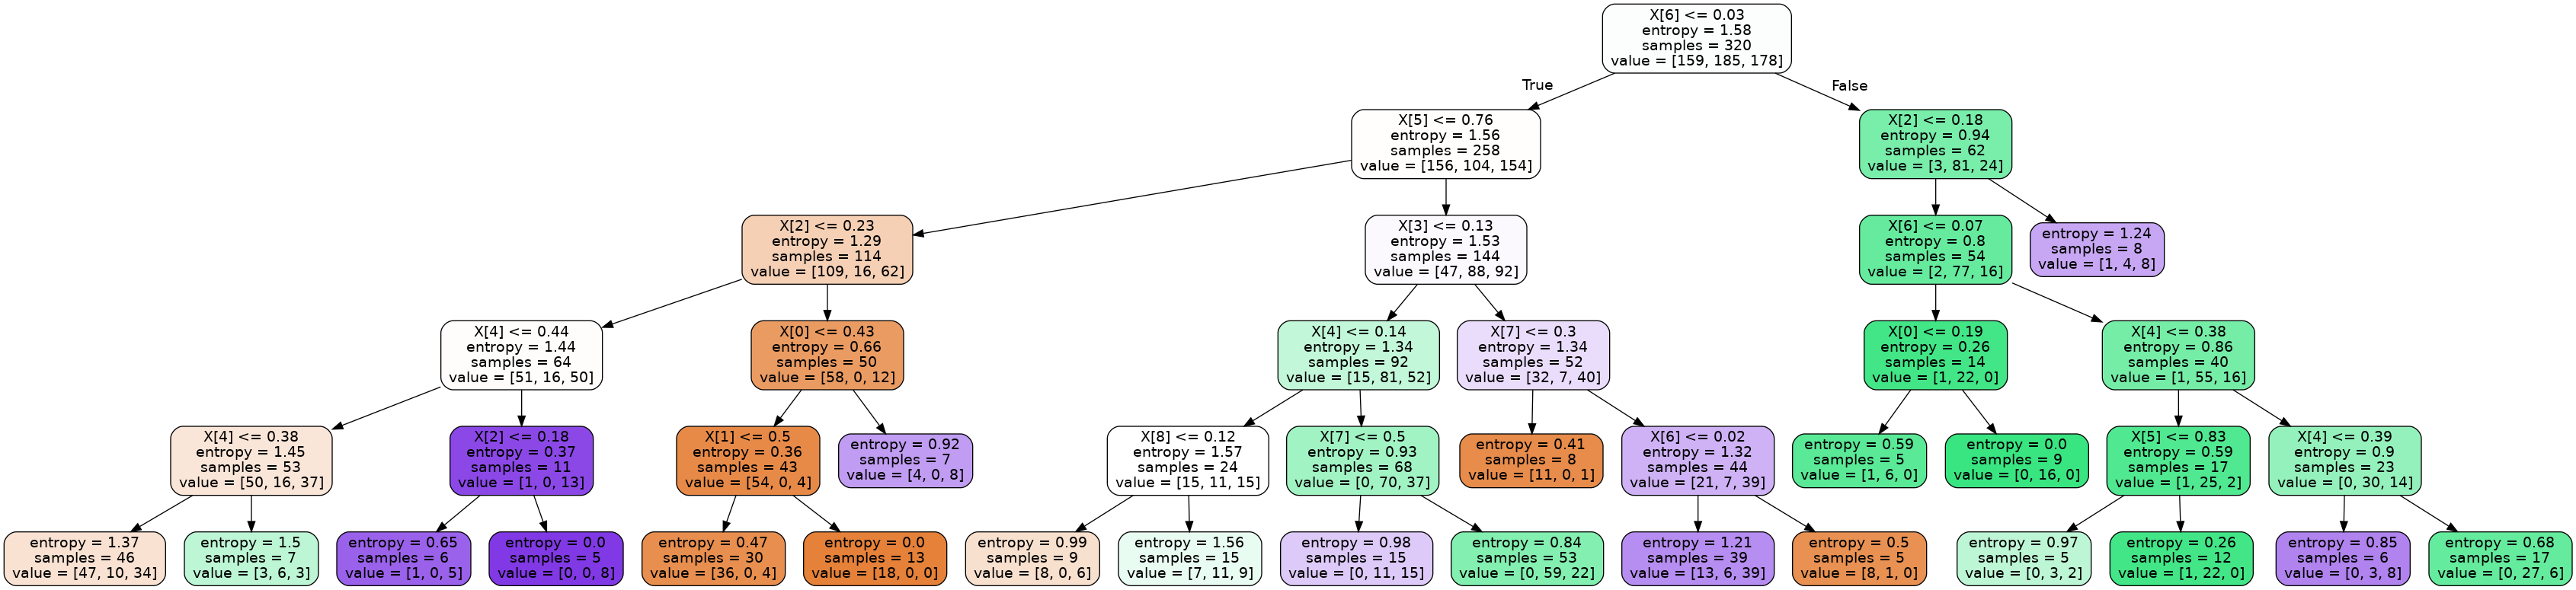

In [103]:
Image(filename = 'tree.png')

In [104]:
model_naive_bayes = GaussianNB()
over = RandomOverSampler(sampling_strategy="not majority", random_state= 42)
under = RandomUnderSampler(sampling_strategy= "all")
steps = [('o', over), ('u', under), ('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
scores = pipeline.score(X_test, y_test)
score_train = pipeline.score(X_train, y_train)
print('Accuracy of Naive Bayes Classifier on the test set: %.5f' % scores)
print('Accuracy of Naive Bayes Classifier on the training set: %.5f' % score_train)

Accuracy of Naive Bayes Classifier on the test set: 0.54074
Accuracy of Naive Bayes Classifier on the training set: 0.60247
